## Part1.数据探索

In [1]:
import pandas as pd
# 数据加载
data = pd.read_csv('./SupplyChain.csv',encoding='unicode-escape')
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [2]:
# 数据查看
data.shape

(180519, 53)

In [3]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [4]:
# 查看为空的值
temp = data.isnull().sum()
temp[temp>0]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [5]:
# 对Customer Zipcode用0进行填充 ,
data['Customer Zipcode'].value_counts()
data['Customer Zipcode']=data['Customer Zipcode'].fillna(0)
data['Customer Zipcode'].isnull().sum()

#删除Order Zipcode，Product Description
data.drop(['Order Zipcode','Product Description'], axis=1, inplace=True)

In [6]:
# 将名字进行合并
data['Customer Name'] = data['Customer Lname']+' '+data['Customer Fname']
data['Customer Name']

0            Holloway Cally
1                Luna Irene
2         Maldonado Gillian
3                 Tate Tana
4            Hendricks Orli
                ...        
180514       Peterson Maria
180515         Clark Ronald
180516           Smith John
180517           Smith Mary
180518        Ortega Andrea
Name: Customer Name, Length: 180519, dtype: object

In [7]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Image',
       'Product Na

In [8]:
# 绘制热力图查看特征相关性
import matplotlib.pyplot as plt
import seaborn as sns

data.corr

<bound method DataFrame.corr of             Type  Days for shipping (real)  Days for shipment (scheduled)  \
0          DEBIT                         3                              4   
1       TRANSFER                         5                              4   
2           CASH                         4                              4   
3          DEBIT                         3                              4   
4        PAYMENT                         2                              4   
...          ...                       ...                            ...   
180514      CASH                         4                              4   
180515     DEBIT                         3                              2   
180516  TRANSFER                         5                              4   
180517   PAYMENT                         3                              4   
180518   PAYMENT                         4                              4   

        Benefit per order  Sales per custom

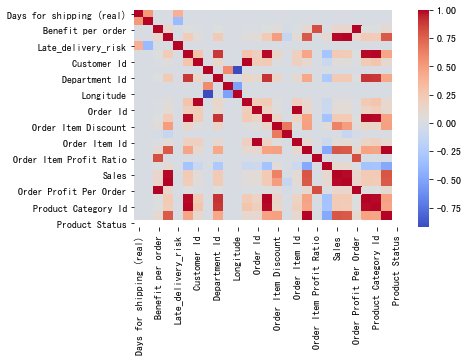

In [9]:
sns.heatmap(data.corr() ,cmap='coolwarm')

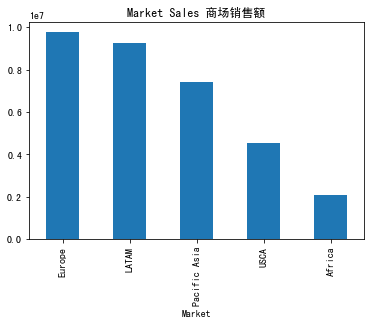

In [10]:
# 基于Market 商场
market=data.groupby('Market')
#各个商场的总销售额
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(title='Market Sales 商场销售额')

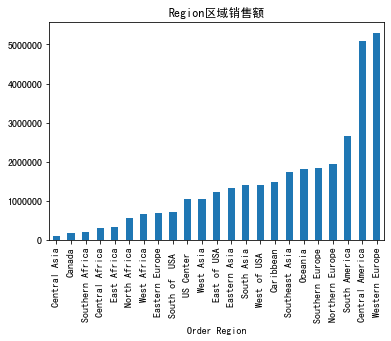

In [11]:
# 基于Order Region 订单区域
Region = data.groupby('Order Region')
# print(Region['Sales per customer'].describe())
Region['Sales per customer'].sum().sort_values().plot.bar(title='Region区域销售额')

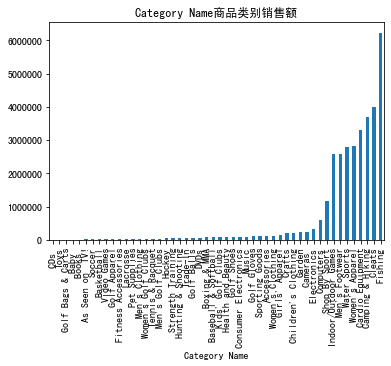

In [12]:
# 基于Category Name 商品类别
Category = data.groupby('Category Name')
Category['Sales per customer'].sum().sort_values().plot.bar(title='Category Name商品类别销售额')

In [13]:
# 按照不同的时间维度（年，月，星期，小时）的趋势
# Product Price(商品价格)与Sales per customer(每个顾客的总销售额)相关性如何
# 订单下单日期order date (DateOrders)
# 转换成时间戳索引
temp=pd.DatetimeIndex(data['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [14]:
# 获取不同尺度的时间
data['order_year'] = temp.year # 年
data['order_month'] = temp.month # 月
data['order_week_day'] = temp.weekday # 周
data['order_day'] = temp.weekday # 天
data['order_hour'] = temp.hour # 小时
data['order_month_year'] = temp.to_period('M') # 年月


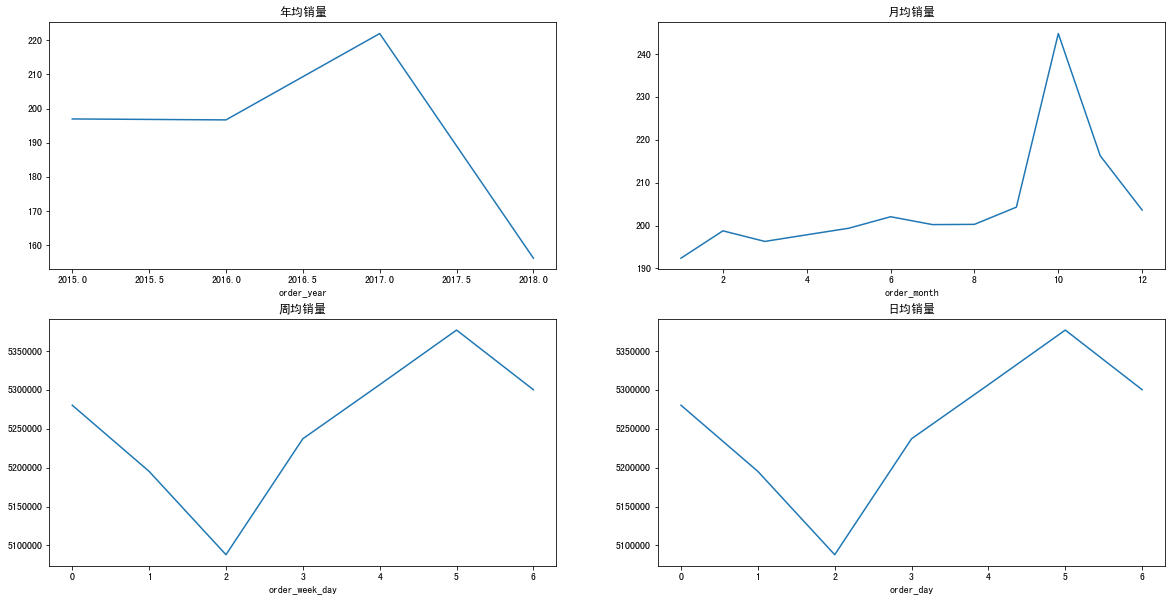

In [15]:
plt.figure(figsize=(20,10))
#年均销量
plt.subplot(2,2,1)
data_year = data.groupby('order_year')
data_year['Sales'].mean().plot(title='年均销量')

#月均销量
plt.subplot(2,2,2)
data_mon = data.groupby('order_month')
data_mon['Sales'].mean().plot(title='月均销量')

#周均销量
plt.subplot(2,2,3)
data_week = data.groupby('order_week_day')
data_week['Sales'].sum().plot(title='周均销量')

#日均销量
plt.subplot(2,2,4)
data_week = data.groupby('order_day')
data_week['Sales'].sum().plot(title='日均销量')

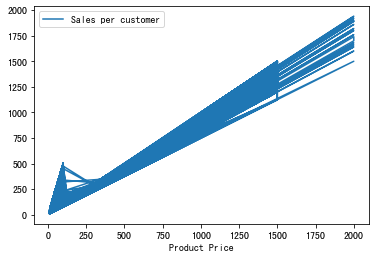

In [16]:
# 查看Product Price与Sales per customer 相关性如何
data.plot(x='Product Price',y='Sales per customer') # 价格越高卖的越好

## Part2.对用户进行分层

In [17]:
# step1.统计每个ID最后一笔订单的时间
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)']).max()
data['order date (DateOrders)'].max()

Timestamp('2018-01-31 23:38:00')

In [18]:
# 设现在的时间为 2018-02-02
import datetime
present = datetime.datetime(2018,2,2)
present

datetime.datetime(2018, 2, 2, 0, 0)

In [19]:
# step2.计算每个用户的RMF指标
# 按照Order Customer Id(订单的客户ID)进行聚合，计算Recency (时间间隔)， Frequency(消费频率，订单总数) ， Monetary(消费金额)
cust_seg = data.groupby('Order Customer Id').agg({'order date (DateOrders)': lambda x:(present - x.max()).days ,
                                                  'Order Id': lambda x:len(x) ,
                                                  'Sales': lambda x:x.sum()})
                                    
# # 将字段名称改为R_Value ， F_Value , M_Value
cust_seg.rename(columns={'order date (DateOrders)':'R_Value',
                         'Order Id':'F_Value',
                         'Sales':'M_Value'},inplace = True)
cust_seg

,R_Value,F_Value,M_Value
Order Customer Id,,,
1,1,1,499.950012
2,1,10,1819.730034
3,1,18,3537.680094
4,1,14,1719.630030
5,1,7,1274.750023
...,...,...,...
20753,1,1,215.820007
20754,1,1,215.820007
20755,1,1,327.750000


In [20]:
# step3.等级划分
quantiles = cust_seg.quantile(q=[0.25, 0.5, 0.75]).to_dict()
quantiles

{'R_Value': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'F_Value': {0.25: 1.0, 0.5: 7.0, 0.75: 15.0},
 'M_Value': {0.25: 293.0400085, 0.5: 1499.82503324, 0.75: 2915.8800654175}}

In [21]:
# Recency =>4 越小越好
def R_Score(a,b,c):
    if a < c[b][0.25]:
        return 4
    elif a < c[b][0.5]:
        return 3
    elif a < c[b][0.75]:
        return 2 
    return 1

# Frequency =>4 越大越好
def F_Score(a,b,c):
    if a < c[b][0.25]:
        return 1
    elif a < c[b][0.5]:
        return 2
    elif a < c[b][0.75]:
        return 3 
    return 4

# Monetary =>4 越大越好
def M_Score(a,b,c):
    if a < c[b][0.25]:
        return 1
    elif a < c[b][0.5]:
        return 2
    elif a < c[b][0.75]:
        return 3 
    return 4

In [22]:
# 新建R_Score , 用于将R_value =>[1,4]
cust_seg['R_Score'] = cust_seg['R_Value'].apply(R_Score,args=('R_Value',quantiles))
cust_seg['F_Score'] = cust_seg['F_Value'].apply(F_Score,args=('F_Value',quantiles))
cust_seg['M_Score'] = cust_seg['M_Value'].apply(M_Score,args=('M_Value',quantiles))
cust_seg

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score
Order Customer Id,,,,,,
1,1,1,499.950012,1,2,2
2,1,10,1819.730034,1,3,3
3,1,18,3537.680094,1,4,4
4,1,14,1719.630030,1,3,3
5,1,7,1274.750023,1,3,2
...,...,...,...,...,...,...
20753,1,1,215.820007,1,2,1
20754,1,1,215.820007,1,2,1
20755,1,1,327.750000,1,2,2


In [23]:
# step4，按照RFM对用户进行分层
# 用户分类	最近一次消费时间间隔（R）	消费频率（F）	消费金额（M）
# 1、重要价值用户	高	高	高
# 2、重要发展用户	高	低	高
# 3、重要保持用户	低	高	高
# 4、重要挽留用户	低	低	高
# 5、一般价值用户	高	高	低
# 6、一般发展用户	高	低	低
# 7、一般保持用户	低	高	低
# 8、一般挽留用户	低	低	低

def RFM(df):
    if df['R_Score'] > 2 and df['F_Score'] >2 and df['M_Score'] > 2 :
        return '重要价值用户'
    
    elif df['R_Score'] > 2 and df['F_Score'] <=2 and df['M_Score'] > 2 :
        return '重要发展用户'
    
    elif df['R_Score'] <= 2 and df['F_Score'] >2 and df['M_Score'] > 2:
        return '重要保持用户'
    
    elif df['R_Score'] <= 2 and df['F_Score'] <= 2 and df['M_Score'] > 2 :
        return '重要挽留用户'
    
    elif df['R_Score'] > 2 and df['F_Score'] >2 and df['M_Score'] <= 2 :
        return '重要价值用户'
    
    elif df['R_Score'] > 2 and df['F_Score'] <= 2 and df['M_Score'] <= 2:
        return '重要价值用户'
    
    elif df['R_Score'] < 2 and df['F_Score'] >2 and df['M_Score']  <= 2:
        return '重要价值用户'
    
    return '一般挽留用户'


In [24]:
cust_seg['Customer_Segmentation'] = cust_seg.apply(RFM, axis=1)
cust_seg

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,Customer_Segmentation
Order Customer Id,,,,,,,
1,1,1,499.950012,1,2,2,一般挽留用户
2,1,10,1819.730034,1,3,3,重要保持用户
3,1,18,3537.680094,1,4,4,重要保持用户
4,1,14,1719.630030,1,3,3,重要保持用户
5,1,7,1274.750023,1,3,2,重要价值用户
...,...,...,...,...,...,...,...
20753,1,1,215.820007,1,2,1,一般挽留用户
20754,1,1,215.820007,1,2,1,一般挽留用户
20755,1,1,327.750000,1,2,2,一般挽留用户


In [25]:
# 不同地区的支付类型情况
pay_DEBIT = data[data['Type'] == 'DEBIT']
pay_TRANSFER = data[data['Type'] == 'TRANSFER']
pay_PAYMENT = data[data['Type'] == 'PAYMENT']
pay_CASH = data[data['Type'] == 'CASH']
# 各区域各付类型数量
count_DEBIT = pay_DEBIT['Order Region'].value_counts()
count_TRANSFER = pay_TRANSFER['Order Region'].value_counts()
count_PAYMENT = pay_PAYMENT['Order Region'].value_counts()
count_CASH = pay_CASH['Order Region'].value_counts()


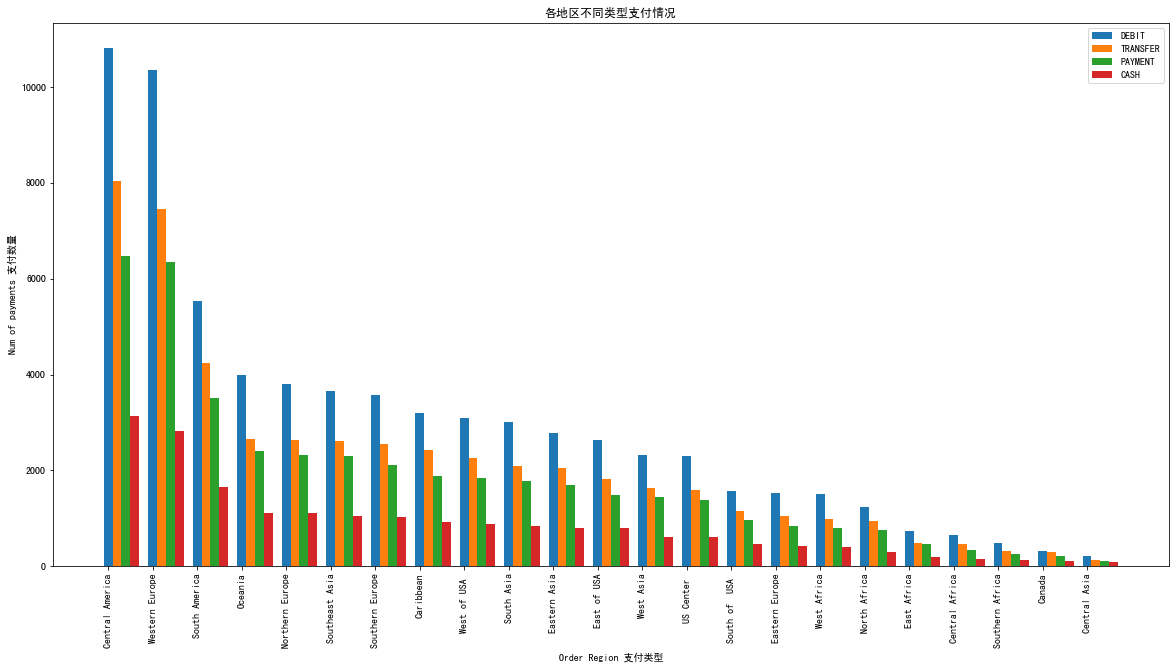

In [26]:
# 展示各地区不同支付方式数量情况
import numpy as np
region_num=len(count_DEBIT)
plt.figure(figsize=(20,10))
x = np.arange(region_num)+1
y1 = plt.bar(x , count_DEBIT, width=0.2 ,label='DEBIT')
y2 = plt.bar(x+0.2 , count_TRANSFER, width=0.2,label='TRANSFER')
y3 = plt.bar(x+0.4, count_PAYMENT, width=0.2,label='PAYMENT')
y4 = plt.bar(x+0.6, count_CASH, width=0.2,label='CASH')
plt.xlabel('Order Region 支付类型')
plt.ylabel('Num of payments 支付数量')
plt.title('各地区不同类型支付情况')
plt.legend()

# 显示刻度
names = data['Order Region'].value_counts().keys()
plt.xticks(x , names , rotation='vertical')
plt.show()

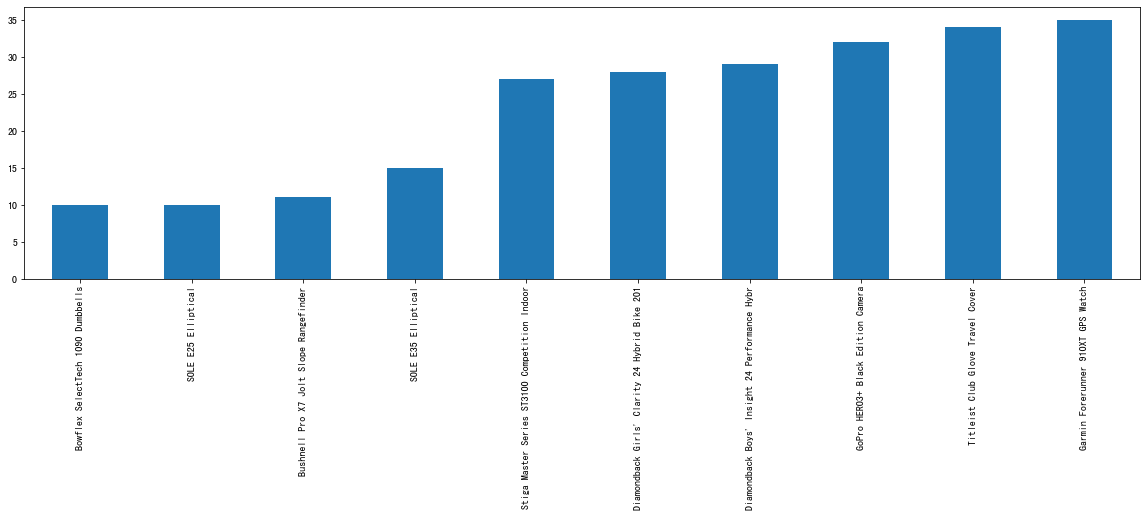

In [27]:
# 对商品收益进行探索 ,负top10的商品
data['Product Name'].value_counts().nsmallest(10).plot.bar(figsize=(20,5))
# top10 = data['Product Name'].value_counts().nlargest(10)

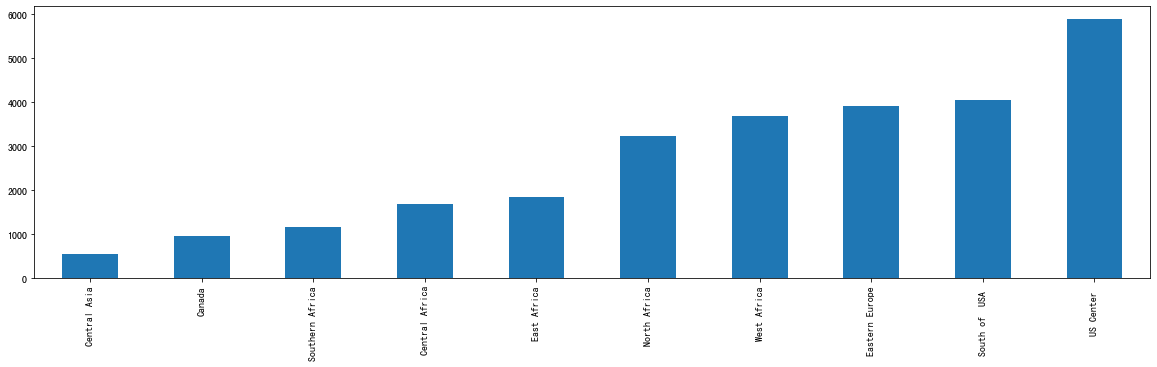

In [28]:
# 商品销售量top10的地区
data['Order Region'].value_counts().nsmallest(10).plot.bar(figsize=(20,5))

In [29]:
# 负收益可能是欺诈交易的支付方式
data[data['Order Status'] == 'SUSPECTED_FRAUD']['Type'].value_counts()

TRANSFER    4062
Name: Type, dtype: int64

Text(0, 0.5, 'Order Region 区域')

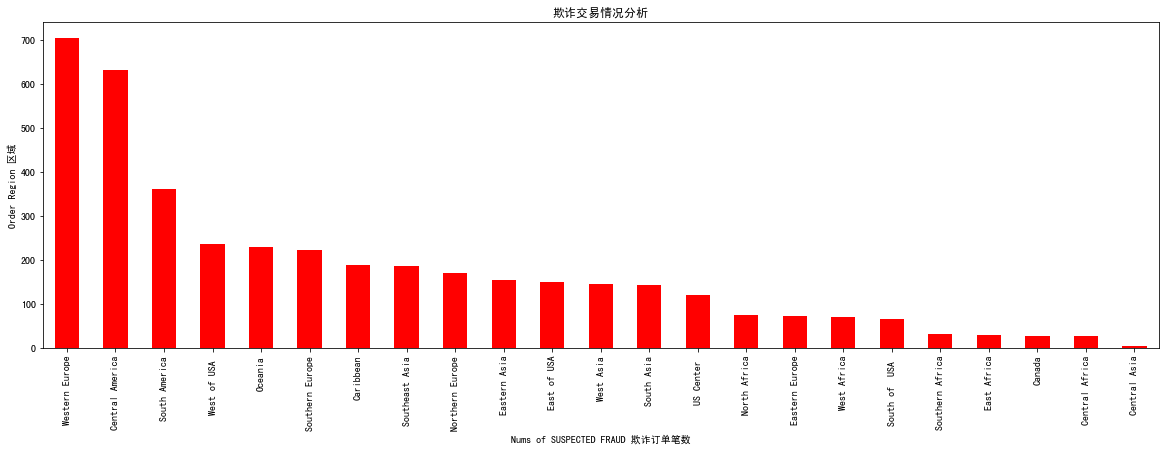

In [30]:
# 不同地区的欺诈交易情况
data[data['Order Status'] == 'SUSPECTED_FRAUD']['Order Region'].value_counts().plot.bar(figsize=(20,6),color='r')
plt.title('欺诈交易情况分析')
plt.xlabel('Nums of SUSPECTED FRAUD 欺诈订单笔数')
plt.ylabel('Order Region 区域')

In [31]:
# 欺诈行为分析
data['fraud'] = np.where(data['Order Status']=='SUSPECTED_FRAUD',1,0) 
data['late_delivery']=np.where(data['Delivery Status']=='Late delivery',1,0)
data['late_delivery'].value_counts()


1    98977
0    81542
Name: late_delivery, dtype: int64

In [32]:
# 删除价值不大的字段，如名称、图片等
data.drop(['Customer Email','Customer Fname','Customer Lname','Customer Password','Product Status','Product Image',
           'Product Name','Customer Zipcode','Customer Zipcode','Order Item Id','Order Item Cardprod Id',
           'Order Item Profit Ratio','Product Category Id','Product Card Id','Order Status','Delivery Status','Late_delivery_risk'],axis=1, inplace=True)

In [33]:
data.drop('Customer Name' , axis=1 , inplace=True)

In [34]:
data.drop(['shipping date (DateOrders)','order date (DateOrders)','order_month_year'],axis=1 , inplace=True)

In [35]:
categorical_col = data.select_dtypes(include='object').columns

In [36]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Category Id',
       'Category Name', 'Customer City', 'Customer Country', 'Customer Id',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id', 'Order Id',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Product Price', 'Shipping Mode', 'order_year',
       'order_month', 'order_week_day', 'order_day', 'order_hour', 'fraud',
       'late_delivery'],
      dtype='object')

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for cat in categorical_col:
    data[cat] = le.fit_transform(data[cat])
data[categorical_col]

,Type,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Street,Department Name,Market,Order City,Order Country,Order Region,Order State,Shipping Mode
0,1,40,66,1,0,36,3683,4,3,331,70,15,475,3
1,3,40,66,1,0,36,1400,4,3,391,69,13,841,3
2,0,40,452,0,0,5,6217,4,3,391,69,13,841,3
3,1,40,285,0,2,5,1803,4,3,3226,8,11,835,3
4,2,40,66,1,1,36,6345,4,3,3226,8,11,835,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,18,59,0,2,31,285,3,3,2922,31,7,913,3
180515,1,18,26,0,1,5,5261,3,3,1362,77,7,770,2
180516,3,18,55,0,1,7,7208,3,3,25,8,11,88,3
180517,2,18,66,1,0,36,1335,3,3,25,8,11,88,3


In [38]:
# 欺诈订单
X_fraud = data.loc[:,data.columns != 'fraud']
Y_fraud = data['fraud']

# 迟交货订单
X_late = data.loc[:,data.columns != 'late_delivery']
Y_late = data['late_delivery']

# 销售额
X_sales = data.loc[:,data.columns != 'Sales']
Y_sales = data['Sales']

#订货数量
X_quantity = data.loc[:,data.columns != 'Order Item Quantity']
Y_quantity = data['Order Item Quantity']


In [39]:
# 数据集切分
from sklearn.model_selection import train_test_split
x_train_fraud,x_test_fraud,y_train_fraud,y_test_fraud = train_test_split(X_fraud, Y_fraud, test_size=0.3)

x_train_late,x_test_late,y_train_late,y_test_late = train_test_split(X_late, Y_late, test_size=0.3)

x_train_sales,x_test_sales,y_train_sales,y_test_sales = train_test_split(X_sales, Y_sales, test_size=0.3)

x_train_quantity,x_test_quantity,y_train_quantity,y_test_quantity = train_test_split(X_quantity, Y_quantity, test_size=0.3)

In [40]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Category Id',
       'Category Name', 'Customer City', 'Customer Country', 'Customer Id',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id', 'Order Id',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Product Price', 'Shipping Mode', 'order_year',
       'order_month', 'order_week_day', 'order_day', 'order_hour', 'fraud',
       'late_delivery'],
      dtype='object')

In [41]:
# 数据规范化
from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
x_train_fraud =sc1.fit_transform(x_train_fraud) 
x_test_fraud =sc1.transform(x_test_fraud) 

sc2 = StandardScaler()
x_train_late =sc2.fit_transform(x_train_late) 
x_test_late =sc2.transform(x_test_late) 

sc3 = StandardScaler()
x_train_sales =sc3.fit_transform(x_train_sales) 
x_test_sales =sc3.transform(x_test_sales) 

sc4 = StandardScaler()
x_train_quantity =sc4.fit_transform(x_train_quantity) 
x_test_quantity =sc4.transform(x_test_quantity) 

# 1-2.对欺诈订单(Order Status)、迟交货订单(Late delivery)进行预测 

In [42]:
from sklearn.metrics import accuracy_score , f1_score , roc_auc_score ,recall_score , confusion_matrix 

# 定义模型函数
def model_stats(model, x_train, y_train, x_test, y_test, name):
    model = model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_pred,y_test)
    auc = roc_auc_score(y_pred , y_test)
    recall = recall_score(y_pred , y_test)
    confusion = confusion_matrix(y_pred , y_test)
    f1 = f1_score(y_pred , y_test)
    print("Model:{}".format(model))
    print("{} Accuracy :{}".format(name,accuracy))
    print("{} AUC :{}".format(name,auc))
    print("{} F1_Score: {}".format(name,f1))
    print("{} Recall: {}".format(name,recall))
    print("{} Confusion Metrix: {}\n\n".format(name,confusion))
#     return accuracy,recall,auc,f1

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
from sklearn.linear_model import LogisticRegression
print("LogisticRegression\n")
model_LR_fraud = LogisticRegression(max_iter=5000)
model_LR_late = LogisticRegression(max_iter=5000)
model_stats(model_LR_fraud,x_train_fraud ,y_train_fraud,  x_test_fraud , y_test_fraud , 'fraud')
model_stats(model_LR_late,x_train_late ,y_train_late,  x_test_late , y_test_late ,'late')


LogisticRegression

Model:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
fraud Accuracy :0.9789681660388507
fraud AUC :0.7626757546228395
fraud F1_Score: 0.3264340626848019
fraud Recall: 0.5422396856581533
fraud Confusion Metrix: [[52741   906]
 [  233   276]]


Model:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
late Accuracy :0.9886623827461408
late AUC :0.9898933368448775
late F1_Score: 0.9897901493232233
late Recall: 0.979786673689

In [44]:
from sklearn.naive_bayes import GaussianNB
model_gnb_fraud = GaussianNB()
model_gnb_late = GaussianNB()
model_stats(model_gnb_fraud,x_train_fraud ,y_train_fraud,  x_test_fraud , y_test_fraud , 'fraud')
model_stats(model_gnb_late,x_train_late ,y_train_late,  x_test_late , y_test_late ,'late')


Model:GaussianNB(priors=None, var_smoothing=1e-09)
fraud Accuracy :0.8801979466725756
fraud AUC :0.5770534550195567
fraud F1_Score: 0.26705829191143243
fraud Recall: 0.15410691003911342
fraud Confusion Metrix: [[46486     0]
 [ 6488  1182]]


Model:GaussianNB(priors=None, var_smoothing=1e-09)
late Accuracy :0.5713494349656548
late AUC :0.7809007852612504
late F1_Score: 0.7194275907080181
late Recall: 0.5618015705225008
late Confusion Metrix: [[ 1180     0]
 [23214 29762]]




In [53]:
from sklearn.svm import LinearSVC
model_svc_fraud = LinearSVC()
model_svc_late = LinearSVC()
model_stats(model_svc_fraud,x_train_fraud ,y_train_fraud,  x_test_fraud , y_test_fraud , 'fraud')
model_stats(model_svc_late,x_train_late ,y_train_late,  x_test_late , y_test_late ,'late')

Model:LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
fraud Accuracy :0.978377280449073
fraud AUC :0.7471905254522097
fraud F1_Score: 0.2855399633923124
fraud Recall: 0.5120350109409191
fraud Confusion Metrix: [[52751   948]
 [  223   234]]


Model:LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
late Accuracy :0.9886623827461408
late AUC :0.9898933368448775
late F1_Score: 0.9897901493232233
late Recall: 0.979786673689755
late Confusion Metrix: [[23780     0]
 [  614 29762]]




In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lda_fraud = LinearDiscriminantAnalysis()
model_lda_late = LinearDiscriminantAnalysis()
model_stats(model_lda_fraud,x_train_fraud ,y_train_fraud,  x_test_fraud , y_test_fraud , 'fraud')
model_stats(model_lda_late,x_train_late ,y_train_late,  x_test_late , y_test_late ,'late')

Model:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
fraud Accuracy :0.9789866312135312
fraud AUC :0.7553155358989176
fraud F1_Score: 0.4606635071090048
fraud Recall: 0.5237068965517241
fraud Confusion Metrix: [[52532   696]
 [  442   486]]


Model:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
late Accuracy :0.9833444124381416
late AUC :0.9841973154050568
late F1_Score: 0.9849711753140724
late Recall: 0.97693019566367
late Confusion Metrix: [[23696   204]
 [  698 29558]]




In [47]:
from sklearn.tree import DecisionTreeClassifier
model_dtc_fraud = DecisionTreeClassifier()
model_dtc_late = DecisionTreeClassifier()
model_stats(model_dtc_fraud,x_train_fraud ,y_train_fraud,  x_test_fraud , y_test_fraud , 'fraud')
model_stats(model_dtc_late,x_train_late ,y_train_late,  x_test_late , y_test_late ,'late')

Model:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
fraud Accuracy :0.9902873181180294
fraud AUC :0.8823329345026165
fraud F1_Score: 0.7808333333333334
fraud Recall: 0.7692939244663383
fraud Confusion Metrix: [[52693   245]
 [  281   937]]


Model:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
   

In [48]:
from sklearn.ensemble import RandomForestClassifier
model_rfc_fraud = RandomForestClassifier()
model_rfc_late = RandomForestClassifier()
model_stats(model_rfc_fraud,x_train_fraud ,y_train_fraud,  x_test_fraud , y_test_fraud , 'fraud')
model_stats(model_rfc_late,x_train_late ,y_train_late,  x_test_late , y_test_late ,'late')

Model:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
fraud Accuracy :0.989474850432085
fraud AUC :0.9868573094856773
fraud F1_Score: 0.6857772877618522
fraud Recall: 0.9841772151898734
fraud Confusion Metrix: [[52964   560]
 [   10   622]]


Model:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_dec

In [49]:
from xgboost import XGBClassifier
model_xgbc_fraud = XGBClassifier()
model_xgbc_late = XGBClassifier()
model_stats(model_xgbc_fraud,x_train_fraud ,y_train_fraud,  x_test_fraud , y_test_fraud , 'fraud')
model_stats(model_xgbc_late,x_train_late ,y_train_late,  x_test_late , y_test_late ,'late')

Model:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
fraud Accuracy :0.9901765270699461
fraud AUC :0.9478502953070903
fraud F1_Score: 0.7321248741188318
fraud Recall: 0.904228855721393
fraud Confusion Metrix: [[52897   455]
 [   77   727]]


Model:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='

In [50]:
from sklearn.neighbors import KNeighborsClassifier
model_knn_fraud = KNeighborsClassifier()
model_knn_late = KNeighborsClassifier()
model_stats(model_knn_fraud,x_train_fraud ,y_train_fraud,  x_test_fraud , y_test_fraud , 'fraud')
model_stats(model_knn_late,x_train_late ,y_train_late,  x_test_late , y_test_late ,'late')

Model:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
fraud Accuracy :0.979245143659059
fraud AUC :0.8435466211069736
fraud F1_Score: 0.1497730711043873
fraud Recall: 0.7071428571428572
fraud Confusion Metrix: [[52933  1083]
 [   41    99]]


Model:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
late Accuracy :0.8538666075781077
late AUC :0.8523056006435417
late F1_Score: 0.866677897574124
late Recall: 0.8690789918237719
late Confusion Metrix: [[20519  4039]
 [ 3875 25723]]




# 3-4.对销售额(Sales)、订货数量(Order Item Quantity)进行预测

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def model_regr_status(model,x_train,y_train,x_test,y_test,name):
    model=model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    print("Model:{}".format(model))
    print("{} MAE :{}".format(name,mae))
    print("{} MSE :{}".format(name,mse))
    print("{} R2: {}\n".format(name,r2))

In [55]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import  LGBMRegressor


In [67]:
model_linear_sales = LinearRegression()
model_linear_quantity = LinearRegression()
model_regr_status(model_linear_sales,x_train_sales ,y_train_sales,  x_test_sales , y_test_sales , 'sales')
model_regr_status(model_linear_quantity,x_train_sales ,y_train_sales,  x_test_sales , y_test_sales ,'quantity')

Model:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
sales MAE :0.0005912392802887692
sales MSE :2.3070848746658914e-06
sales R2: 0.9999999998693722

Model:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
quantity MAE :0.0005912392802887692
quantity MSE :2.3070848746658914e-06
quantity R2: 0.9999999998693722



In [68]:
model_lasso_sales = Lasso()
model_Lasso_quantity = Lasso()
model_regr_status(model_lasso_sales,x_train_sales ,y_train_sales,  x_test_sales , y_test_sales , 'sales')
model_regr_status(model_Lasso_quantity,x_train_sales ,y_train_sales,  x_test_sales , y_test_sales ,'quantity')


Model:Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
sales MAE :0.8374540155971205
sales MSE :1.3553838667752933
sales R2: 0.9999232577550784

Model:Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
quantity MAE :0.8374540155971205
quantity MSE :1.3553838667752933
quantity R2: 0.9999232577550784



In [69]:
model_ridge_sales = Ridge()
model_ridge_quantity = Ridge()
model_regr_status(model_ridge_sales,x_train_sales ,y_train_sales,  x_test_sales , y_test_sales , 'sales')
model_regr_status(model_ridge_quantity,x_train_sales ,y_train_sales,  x_test_sales , y_test_sales ,'quantity')

Model:Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
sales MAE :0.0013269880876284272
sales MSE :5.839517436953551e-06
sales R2: 0.9999999996693647

Model:Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
quantity MAE :0.0013269880876284272
quantity MSE :5.839517436953551e-06
quantity R2: 0.9999999996693647



In [70]:
model_dtr_sales = DecisionTreeRegressor()
model_dtr_quantity = DecisionTreeRegressor()
model_regr_status(model_dtr_sales,x_train_sales ,y_train_sales,  x_test_sales , y_test_sales , 'sales')
model_regr_status(model_dtr_quantity,x_train_sales ,y_train_sales,  x_test_sales , y_test_sales ,'quantity')

Model:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
sales MAE :0.013453911091647314
sales MSE :0.5131461136393914
sales R2: 0.9999709455116748

Model:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
quantity MAE :0.012414138281801632
quantity MSE :0.4973839096632664
quantity R2: 0.99997183797

In [71]:
model_rfr_sales = RandomForestRegressor()
model_rfr_quantity = RandomForestRegressor()
model_regr_status(model_rfr_sales,x_train_sales ,y_train_sales,  x_test_sales , y_test_sales , 'sales')
model_regr_status(model_rfr_quantity,x_train_sales ,y_train_sales,  x_test_sales , y_test_sales ,'quantity')

Model:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
sales MAE :0.021506974213627565
sales MSE :0.3017041049272924
sales R2: 0.9999829174222287

Model:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_

In [72]:
model_lgbmr_sales = LGBMRegressor()
model_lgbmr_quantity = LGBMRegressor()
model_regr_status(model_linear_fraud,x_train_sales ,y_train_sales,  x_test_sales , y_test_sales , 'sales')
model_regr_status(model_linear_late,x_train_sales ,y_train_sales,  x_test_sales , y_test_sales ,'quantity')

Model:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
sales MAE :0.0005912392802887692
sales MSE :2.3070848746658914e-06
sales R2: 0.9999999998693722

Model:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
quantity MAE :0.0005912392802887692
quantity MSE :2.3070848746658914e-06
quantity R2: 0.9999999998693722



In [73]:
model_xgbr_sales = XGBRegressor()
model_xgbr_quantity = XGBRegressor()
model_regr_status(model_xgbr_sales,x_train_sales ,y_train_sales,  x_test_sales , y_test_sales , 'sales')
model_regr_status(model_xgbr_quantity,x_train_sales ,y_train_sales,  x_test_sales , y_test_sales ,'quantity')

Model:XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
sales MAE :0.13060712999325466
sales MSE :0.30560507719378704
sales R2: 0.9999826965479978

Model:XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
  